In [1]:
# Kaggle: https://www.kaggle.com/c/titanic/overview

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
titanic = pd.read_csv("train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.shape

(891, 12)

In [5]:
def summarize_features(df):
    # first column will be data types of each feature
    summary = pd.DataFrame(df.dtypes, columns = ['dtypes'])
    summary = summary.reset_index()
    # how many missing values in each feature
    summary['Missing'] = df.isnull().sum().values
    # how many unique values in each feature (cardinality indicator)
    summary['Uniques'] = df.nunique().values

    return summary

summarize_features(titanic)

,index,dtypes,Missing,Uniques
0,PassengerId,int64,0,891
1,Survived,int64,0,2
2,Pclass,int64,0,3
3,Name,object,0,891
4,Sex,object,0,2
5,Age,float64,177,88
6,SibSp,int64,0,7
7,Parch,int64,0,7
8,Ticket,object,0,681
9,Fare,float64,0,248


In [6]:
# Hapus kolom "PassengerId" dan "Name" -> Data personal (unique)
# Hapus kolom "Cabin" -> Missing-nya banyak (687)
# Hapus kolom "Ticket" -> Object dengan unique banyak (681) 
titanic = titanic.drop(columns = ["PassengerId", "Name", "Cabin", "Ticket"])

summarize_features(titanic)

,index,dtypes,Missing,Uniques
0,Survived,int64,0,2
1,Pclass,int64,0,3
2,Sex,object,0,2
3,Age,float64,177,88
4,SibSp,int64,0,7
5,Parch,int64,0,7
6,Fare,float64,0,248
7,Embarked,object,2,3


In [7]:
titanic.shape

(891, 8)

### 1. Handling Missing Value

In [8]:
# Variabel dengan missing -> "Age" dan "Embarked"

# "Embarked" -> Isi dengan modus
titanic["Embarked"] = titanic["Embarked"].fillna(titanic["Embarked"].value_counts().index[0])

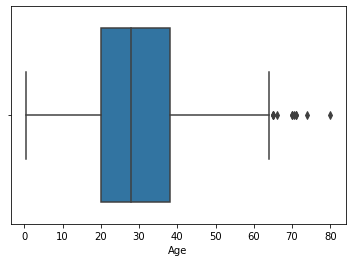

In [9]:
sns.boxplot(titanic["Age"])

In [10]:
# "Age" -> Isi dengan median
titanic["Age"].fillna(titanic["Age"].median(), inplace = True)

In [11]:
summarize_features(titanic)

,index,dtypes,Missing,Uniques
0,Survived,int64,0,2
1,Pclass,int64,0,3
2,Sex,object,0,2
3,Age,float64,0,88
4,SibSp,int64,0,7
5,Parch,int64,0,7
6,Fare,float64,0,248
7,Embarked,object,0,3


### 2. Handling Categorical Data

In [12]:
# "Sex" dan "Embarked" adalah variabel kategorik (nominal)
#encode the data
data_encoded = pd.get_dummies(data = titanic[["Sex", "Embarked"]], drop_first = True)
data_encoded

,Sex_male,Embarked_Q,Embarked_S
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1
...,...,...,...
886,1,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [13]:
# Menggabungkan dengan data keseluruhan
titanic = pd.concat(objs = [titanic, data_encoded], axis = 1)
titanic.drop(["Sex", "Embarked"], axis = 1, inplace = True)

In [14]:
titanic

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,28.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


### 3. Feature Scaling

In [15]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,0.647587,0.086420,0.725028
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,0.477990,0.281141,0.446751
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
titanic.iloc[:, 1:] = sc.fit_transform(titanic.iloc[:, 1:])

In [17]:
# SUDAH OKE, SIAP DIBUAT MODEL
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,0.737695,-0.307562,0.615838
1,1,-1.566107,0.663861,0.432793,-0.473674,0.786845,-1.355574,-0.307562,-1.623803
2,1,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,-1.355574,-0.307562,0.615838
3,1,-1.566107,0.433312,0.432793,-0.473674,0.420730,-1.355574,-0.307562,0.615838
4,0,0.827377,0.433312,-0.474545,-0.473674,-0.486337,0.737695,-0.307562,0.615838


### 4. Modelling

In [18]:
X = titanic.iloc[:, 1:].values
y = titanic.iloc[:, 0].values

In [19]:
# Splitting into the training set and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [20]:
# 1. K-NEAREST NEIGHBORS (K-NN)
from sklearn.neighbors import KNeighborsClassifier
classifier1 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier1.fit(X_train, y_train)

KNeighborsClassifier()

In [21]:
# Evaluasi
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred1 = classifier1.predict(X_test)
cm1 = confusion_matrix(y_test, y_pred1)
print(cm1)
accuracy_score(y_test, y_pred1)

[[119  20]
 [ 23  61]]


0.8071748878923767

In [22]:
# Perbandingan Data Asli dan Hasil Prediksi
print(np.concatenate((y_test.reshape(len(y_test), 1), y_pred1.reshape(len(y_pred1), 1)), 1))

[[0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]

In [23]:
# 2. LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
classifier2 = LogisticRegression(random_state = 0)
classifier2.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [24]:
# Evaluasi
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred2 = classifier2.predict(X_test)
cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)
accuracy_score(y_test, y_pred2)

[[116  23]
 [ 23  61]]


0.7937219730941704

In [25]:
# 3. KERNEL SVM
from sklearn.svm import SVC
classifier3 = SVC(kernel = 'rbf', random_state = 0)
classifier3.fit(X_train, y_train)

SVC(random_state=0)

In [26]:
# Evaluasi
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred3 = classifier3.predict(X_test)
cm3 = confusion_matrix(y_test, y_pred3)
print(cm3)
accuracy_score(y_test, y_pred3)

[[121  18]
 [ 26  58]]


0.8026905829596412

In [27]:
# 4. NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
classifier4 = GaussianNB()
classifier4.fit(X_train, y_train)

GaussianNB()

In [28]:
# Evaluasi
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred4 = classifier4.predict(X_test)
cm4 = confusion_matrix(y_test, y_pred4)
print(cm4)
accuracy_score(y_test, y_pred4)

[[111  28]
 [ 21  63]]


0.7802690582959642

In [29]:
# 5. DECISION TREE
from sklearn.tree import DecisionTreeClassifier
classifier5 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier5.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [30]:
# Evaluasi
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred5 = classifier5.predict(X_test)
cm5 = confusion_matrix(y_test, y_pred5)
print(cm5)
accuracy_score(y_test, y_pred5)

[[115  24]
 [ 25  59]]


0.7802690582959642

In [31]:
# 6. RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
classifier6 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier6.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [32]:
# Evaluasi
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred6 = classifier6.predict(X_test)
cm6 = confusion_matrix(y_test, y_pred6)
print(cm6)
accuracy_score(y_test, y_pred6)

[[122  17]
 [ 28  56]]


0.7982062780269058

## Terapkan Model pada Data test.csv

In [45]:
data_test = pd.read_csv("test.csv")
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [46]:
# Hapus kolom "PassengerId", "Name", "Cabin", "Ticket"
data_test = data_test.drop(columns = ["Name", "Cabin", "Ticket"])
data_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [47]:
summarize_features(data_test)

,index,dtypes,Missing,Uniques
0,PassengerId,int64,0,418
1,Pclass,int64,0,3
2,Sex,object,0,2
3,Age,float64,86,79
4,SibSp,int64,0,7
5,Parch,int64,0,8
6,Fare,float64,1,169
7,Embarked,object,0,3


In [48]:
# Missing value dijadikan nilai "0"
data_test.fillna(0, inplace = True)

In [49]:
summarize_features(data_test)

,index,dtypes,Missing,Uniques
0,PassengerId,int64,0,418
1,Pclass,int64,0,3
2,Sex,object,0,2
3,Age,float64,0,80
4,SibSp,int64,0,7
5,Parch,int64,0,8
6,Fare,float64,0,169
7,Embarked,object,0,3


In [50]:
# Handling Categorical Data
data_test_encoded = pd.get_dummies(data = data_test[["Sex", "Embarked"]], drop_first = True)
data_test_encoded

,Sex_male,Embarked_Q,Embarked_S
0,1,1,0
1,0,0,1
2,1,1,0
3,1,0,1
4,0,0,1
...,...,...,...
413,1,0,1
414,0,0,0
415,1,0,1
416,1,0,1


In [51]:
# Menggabungkan dengan data keseluruhan
data_test = pd.concat(objs = [data_test, data_test_encoded], axis = 1)
data_test.drop(["Sex", "Embarked"], axis = 1, inplace = True)

In [52]:
data_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [53]:
# Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data_test.iloc[:, 1:] = sc.fit_transform(data_test.iloc[:, 1:])

In [54]:
data_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,892,0.873482,0.594801,-0.499470,-0.400248,-0.496637,0.755929,2.843757,-1.350676
1,893,0.873482,1.305896,0.616992,-0.400248,-0.511497,-1.322876,-0.351647,0.740370
2,894,-0.315819,2.159209,-0.499470,-0.400248,-0.463335,0.755929,2.843757,-1.350676
3,895,0.873482,0.168145,-0.499470,-0.400248,-0.481704,0.755929,-0.351647,0.740370
4,896,0.873482,-0.116293,0.616992,0.619896,-0.416740,-1.322876,-0.351647,0.740370


In [55]:
data_test_X = data_test.iloc[:, 1:].values
data_test_X

array([[ 0.87348191,  0.59480137, -0.49947002, ...,  0.75592895,
         2.84375747, -1.35067551],
       [ 0.87348191,  1.30589556,  0.61699237, ..., -1.32287566,
        -0.35164743,  0.74037028],
       [-0.31581919,  2.15920859, -0.49947002, ...,  0.75592895,
         2.84375747, -1.35067551],
       ...,
       [ 0.87348191,  0.82235151, -0.49947002, ...,  0.75592895,
        -0.35164743,  0.74037028],
       [ 0.87348191, -1.3678186 , -0.49947002, ...,  0.75592895,
        -0.35164743,  0.74037028],
       [ 0.87348191, -1.3678186 ,  0.61699237, ...,  0.75592895,
        -0.35164743, -1.35067551]])

In [57]:
# Terapkan Model K-NN ("classifier1")
data_test_pred = classifier1.predict(data_test_X)
print(data_test_pred)

[0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 0
 1 0 0 1 0 1 1 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 1 0 1 1 1 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1
 1 1 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 1
 1 0 1 1 1 0 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0
 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 1 0 1 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0
 0 1 1 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 0 1 0 1 1 0 0 1 0 0 1]


In [58]:
data_test["Survived"] = data_test_pred
data_test["Survived"]

0      0
1      0
2      0
3      1
4      1
      ..
413    0
414    1
415    0
416    0
417    1
Name: Survived, Length: 418, dtype: int64

In [59]:
submission = data_test[["PassengerId", "Survived"]]
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1


In [65]:
# Save "submission" dalam bentuk csv
submission.to_csv("Submission Titanic.csv", index = False)